In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import json
import time
from scipy.stats import linregress
from pprint import pprint

covid_clean_CA_TX=pd.read_csv("../Resources/covid_clean_CA_TX.csv", encoding="ISO-8859-1")

In [3]:
covid_clean_CA_TX

,State,countyFIPS,County Name,population,stateFIPS,1/22/2020,1/23/2020,1/24/2020,1/25/2020,1/26/2020,...,10/21/2020,10/22/2020,10/23/2020,10/24/2020,10/25/2020,10/26/2020,10/27/2020,10/28/2020,10/29/2020,10/30/2020
0,CA,6000,Grand Princess Cruise Ship,0,6,0,0,0,0,0,...,21,21,21,21,21,21,21,21,21,21
1,CA,6001,Alameda County,1671329,6,0,0,0,0,0,...,22932,23001,23133,23215,23312,23391,23391,23576,23636,23775
2,CA,6003,Alpine County,1129,6,0,0,0,0,0,...,3,3,3,3,3,3,3,3,3,3
3,CA,6005,Amador County,39752,6,0,0,0,0,0,...,276,287,291,291,291,299,301,302,308,311
4,CA,6007,Butte County,219186,6,0,0,0,0,0,...,3018,3030,3047,3047,3047,3073,3073,3113,3127,3144
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308,TX,48499,Wood County,45539,48,0,0,0,0,0,...,621,623,626,626,626,633,636,639,655,655
309,TX,48501,Yoakum County,8713,48,0,0,0,0,0,...,289,289,289,289,289,289,289,300,304,319
310,TX,48503,Young County,18010,48,0,0,0,0,0,...,497,507,521,535,535,535,559,578,591,605
311,TX,48505,Zapata County,14179,48,0,0,0,0,0,...,342,342,343,345,346,346,352,352,352,357


In [4]:
#drop unnecessary column and just get the cases and state
daily_cases= covid_clean_CA_TX.drop(columns=['countyFIPS','County Name','stateFIPS','population'])
daily_cases

,State,1/22/2020,1/23/2020,1/24/2020,1/25/2020,1/26/2020,1/27/2020,1/28/2020,1/29/2020,1/30/2020,...,10/21/2020,10/22/2020,10/23/2020,10/24/2020,10/25/2020,10/26/2020,10/27/2020,10/28/2020,10/29/2020,10/30/2020
0,CA,0,0,0,0,0,0,0,0,0,...,21,21,21,21,21,21,21,21,21,21
1,CA,0,0,0,0,0,0,0,0,0,...,22932,23001,23133,23215,23312,23391,23391,23576,23636,23775
2,CA,0,0,0,0,0,0,0,0,0,...,3,3,3,3,3,3,3,3,3,3
3,CA,0,0,0,0,0,0,0,0,0,...,276,287,291,291,291,299,301,302,308,311
4,CA,0,0,0,0,0,0,0,0,0,...,3018,3030,3047,3047,3047,3073,3073,3113,3127,3144
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308,TX,0,0,0,0,0,0,0,0,0,...,621,623,626,626,626,633,636,639,655,655
309,TX,0,0,0,0,0,0,0,0,0,...,289,289,289,289,289,289,289,300,304,319
310,TX,0,0,0,0,0,0,0,0,0,...,497,507,521,535,535,535,559,578,591,605
311,TX,0,0,0,0,0,0,0,0,0,...,342,342,343,345,346,346,352,352,352,357


In [5]:
#Total daily Cases 
sum_cases=daily_cases.groupby(["State"]).sum()
total_daily_cases=sum_cases.T
total_daily_cases

State,CA,TX
1/22/2020,0,0
1/23/2020,0,0
1/24/2020,0,0
1/25/2020,0,0
1/26/2020,2,0
...,...,...
10/26/2020,910880,879014
10/27/2020,915400,886182
10/28/2020,919593,891986
10/29/2020,923502,899052


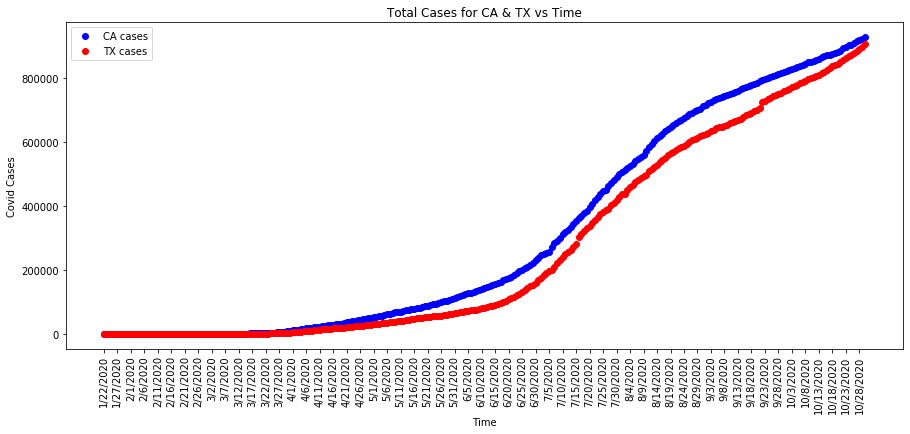

<Figure size 432x288 with 0 Axes>

In [6]:
# fig, ax=plt.subplots()
# ax.plot(total_daily_cases)
# ax.set_title("Total Daily Cases for CA & TX")
# ax.legend("CA","TX")
# ax.xaxis.set_label_text("Time")
# ax.yaxis.set_label_text("Covid Cases")
# plt.show()
fig, ax=plt.subplots(figsize=(15,6))
CA_cases=total_daily_cases["CA"]
x_axis=total_daily_cases.index
TX_cases=total_daily_cases["TX"]
CA, =plt.plot(x_axis, CA_cases,marker='o',color="blue",linewidth=0, label="CA cases")
TX, =plt.plot(x_axis, TX_cases,marker='o',color="red",linewidth=0,label="TX cases")
plt.legend(handles=[CA, TX],loc="best")
plt.xticks(rotation='vertical')
ax.set_xticks(ax.get_xticks()[::5])
plt.title("Total Cases for CA & TX vs Time")
plt.xlabel("Time")
plt.ylabel("Covid Cases")
plt.show()
plt.savefig("../Images/Total Cases for CA & TX vs Time")

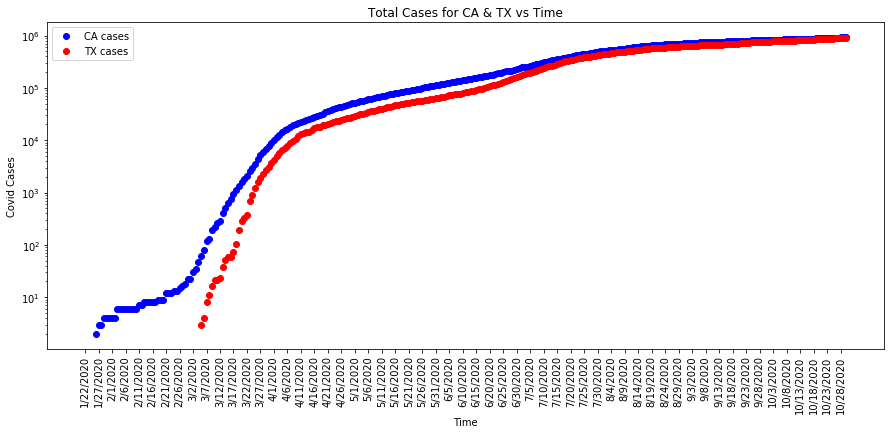

<Figure size 432x288 with 0 Axes>

In [10]:
#log scale
fig, ax=plt.subplots(figsize=(15,6))
CA_cases=total_daily_cases["CA"]
x_axis=total_daily_cases.index
TX_cases=total_daily_cases["TX"]
CA, =plt.plot(x_axis, CA_cases,marker='o',color="blue",linewidth=0, label="CA cases")
TX, =plt.plot(x_axis, TX_cases,marker='o',color="red",linewidth=0,label="TX cases")
plt.legend(handles=[CA, TX],loc="best")
plt.xticks(rotation='vertical')
ax.set_xticks(ax.get_xticks()[::5])
ax.set_yscale('log')
plt.title("Total Cases for CA & TX vs Time")
plt.xlabel("Time")
plt.ylabel("Covid Cases")
plt.show()
plt.savefig("../Images/Total Cases for CA & TX vs Time- log scale")


In [8]:
#New daily cases by state
new_daily_cases=total_daily_cases.diff()
new_daily_cases

State,CA,TX
1/22/2020,NaN,NaN
1/23/2020,0.0,0.0
1/24/2020,0.0,0.0
1/25/2020,0.0,0.0
1/26/2020,2.0,0.0
...,...,...
10/26/2020,5137.0,4727.0
10/27/2020,4520.0,7168.0
10/28/2020,4193.0,5804.0
10/29/2020,3909.0,7066.0


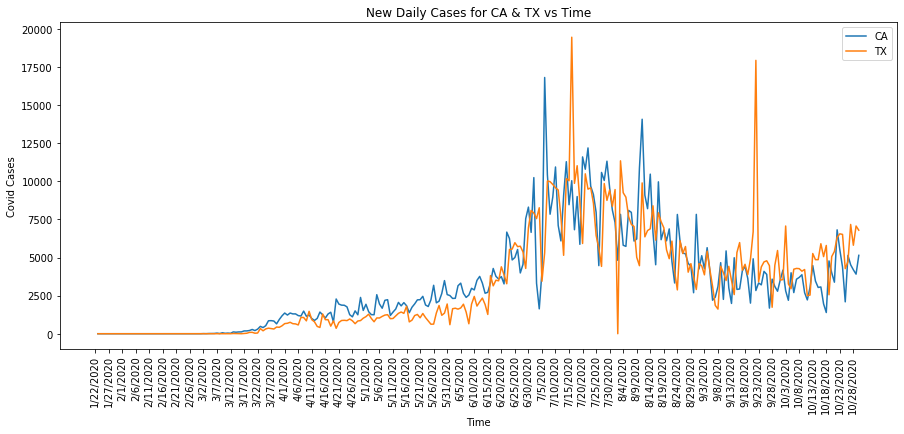

<Figure size 432x288 with 0 Axes>

In [9]:
#line graph2 for new daily cases
# CA_new_cases=new_daily_cases["CA"]
# x_axis=new_daily_cases.index
# TX_new_cases=new_daily_cases["TX"]
# fig1,ax1=plt.subplots(figsize=(15,6))
# CA1, =plt.plot(x_axis, CA_new_cases,"-",color="blue",linewidth=0, label="CA cases")
# TX1, =plt.plot(x_axis, TX_new_cases,"-",color="red",linewidth=0,label="TX cases")
# plt.legend(handles=[CA1, TX1],loc="best")
# ax1.set_xticks(ax1.get_xticks()[::5])
# plt.xticks(rotation='vertical')
# plt.title("New Daily Cases for CA & TX")
# plt.xlabel("Time")
# plt.ylabel("Covid Cases")
# plt.show()
fig1,ax1=plt.subplots(figsize=(15,6))
ax1.plot(new_daily_cases)
plt.xticks(rotation='vertical')
ax1.set_xticks(ax1.get_xticks()[::5])
plt.legend(["CA", "TX"])
plt.title("New Daily Cases for CA & TX vs Time")
plt.xlabel("Time")
plt.ylabel("Covid Cases")
plt.show()
plt.savefig("../Images/New Daily Cases for CA & TX vs Time")